In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('Age dependency ratio.csv')

In [19]:
print(df.head())

                  Country Name Country Code       1960       1961       1962  \
0                        Aruba          ABW  83.500790  83.187816  83.199741   
1  Africa Eastern and Southern          AFE  89.594604  89.873370  90.191721   
2                  Afghanistan          AFG  80.051114  80.222340  80.401943   
3   Africa Western and Central          AFW  80.771787  81.112636  81.540335   
4                       Angola          AGO  82.871313  84.579357  86.408680   

        1963       1964       1965       1966       1967  ...       2014  \
0  82.901604  82.239068  81.218978  79.931415  78.297987  ...  43.635179   
1  90.574678  90.952719  91.346821  91.785500  92.211969  ...  85.499375   
2  80.715318  81.219557  81.994815  82.954722  83.908073  ...  94.706697   
3  82.142420  82.998282  83.758330  84.297587  84.811279  ...  89.533203   
4  88.354394  90.509896  92.516900  94.251580  95.901353  ...  93.501973   

        2015       2016       2017       2018       2019      

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1960          264 non-null    float64
 3   1961          264 non-null    float64
 4   1962          264 non-null    float64
 5   1963          264 non-null    float64
 6   1964          264 non-null    float64
 7   1965          264 non-null    float64
 8   1966          264 non-null    float64
 9   1967          264 non-null    float64
 10  1968          264 non-null    float64
 11  1969          264 non-null    float64
 12  1970          264 non-null    float64
 13  1971          264 non-null    float64
 14  1972          264 non-null    float64
 15  1973          264 non-null    float64
 16  1974          264 non-null    float64
 17  1975          264 non-null    float64
 18  1976          264 non-null    

In [21]:
# Reshape the data
df_melted = df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Value')

In [22]:
# Convert 'Year' to integer
df_melted['Year'] = df_melted['Year'].astype(int)

In [23]:
# Handle missing values: Option to drop or fill missing values
df_melted.dropna(subset=['Value'], inplace=True)

In [27]:
print(df_melted.head

                  Country Name Country Code  Year      Value
0                        Aruba          ABW  1960  83.500790
1  Africa Eastern and Southern          AFE  1960  89.594604
2                  Afghanistan          AFG  1960  80.051114
3   Africa Western and Central          AFW  1960  80.771787
4                       Angola          AGO  1960  82.871313


In [29]:
# Aggregate data by country
df_country_avg = df_melted.groupby('Country Name')['Value'].mean().reset_index()

In [30]:
# Sort the data for better visualization
df_country_avg.sort_values('Value', ascending=False, inplace=True)

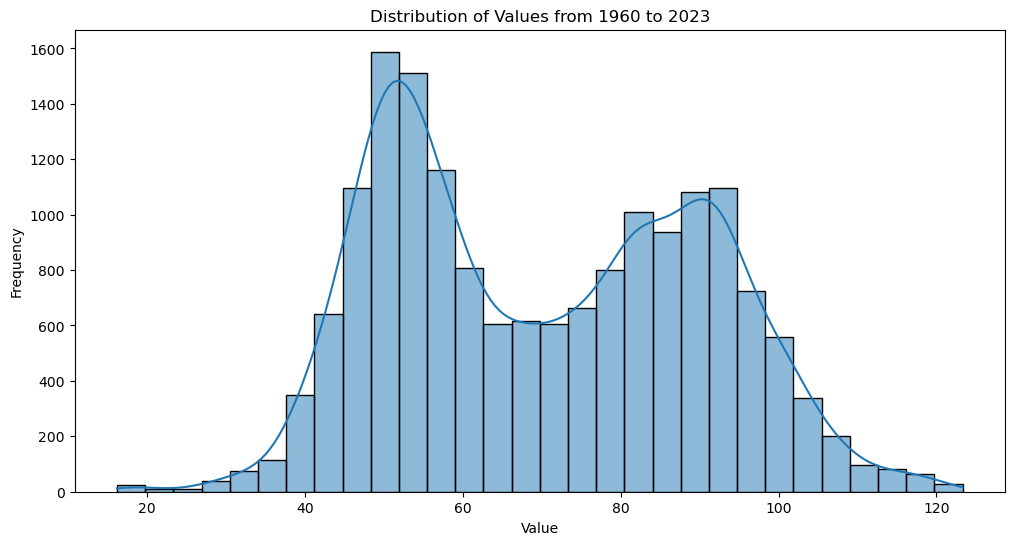

In [33]:
# Create a histogram for the continuous variable (Value)
plt.figure(figsize=(12, 6))
sns.histplot(df_melted['Value'], bins=30, kde=True)
plt.title('Distribution of Values from 1960 to 2023')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

C:\Users\Sayali Suryawanshi\AppData\Local\Temp\ipykernel_19144\2568362302.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Year', y='Value', ci=None)


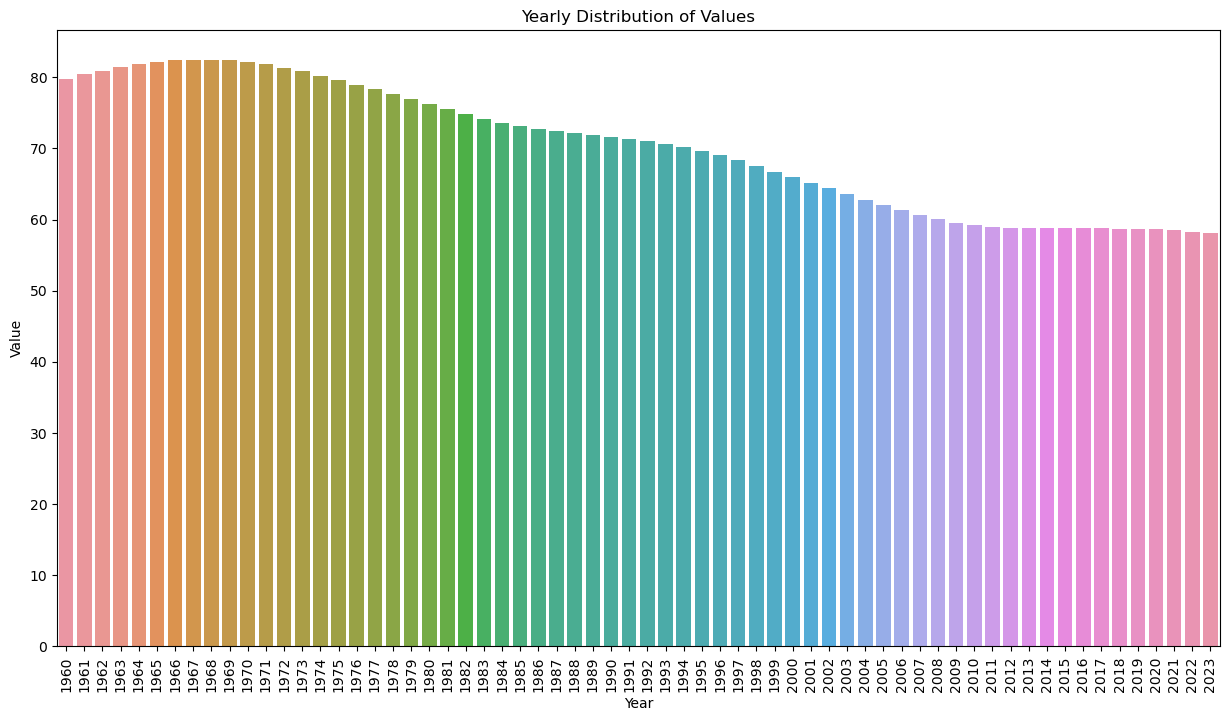

In [25]:
# Create a bar chart for the continuous variable (Value)
plt.figure(figsize=(15, 8))
sns.barplot(data=df_melted, x='Year', y='Value', ci=None)
plt.title('Yearly Distribution of Values')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()